In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import k_means
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import random


#### Para la reduccion de dimensionalidad utilizare el dataset de digitos MNIST

In [18]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [8]:
digits = load_digits()
x = digits.data

In [9]:

x.shape

(1797, 64)

In [11]:
pd.DataFrame(digits.target)


,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


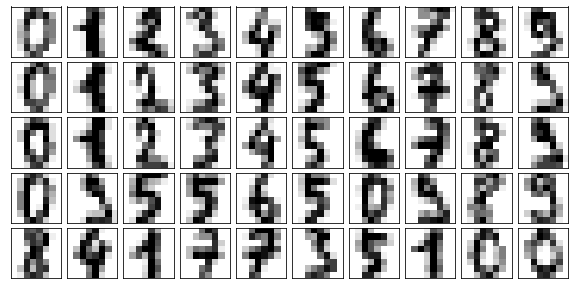

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(5, 10, figsize=(10,5),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
        cmap = 'binary', interpolation = 'nearest',
        clim = (0, 16))

plot_digits(x)

#### aplicacion de pca

In [23]:
pca_sk = PCA(n_components=2)
X2D = pca_sk.fit_transform(x)
X2D.shape

(1797, 2)

Usar t-sne sobre la salida de el paso 1(reducir a 3 a 2 dimensiones)

In [24]:
print(x.shape)
print(X2D.shape)

(1797, 64)
(1797, 2)


Text(0, 0.5, 'y axis')

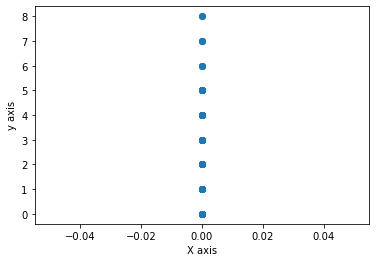

In [30]:
plt.scatter(x[:,0], x[:,1])
plt.xlabel('X axis')
plt.ylabel('y axis')

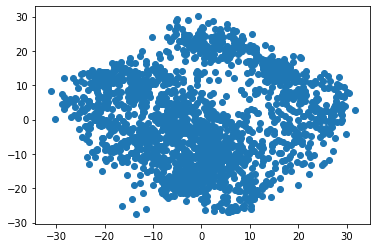

In [25]:
plt.scatter(X2D[:,0], X2D[:,1])
plt.xlabel('X axis')
plt.ylabel('y axis')



#### Si el dataset original contiene etiquetas: Graficar los datos en baja dimensionalidad asignando un color o marker según  la etiqueta y analizar si las clases tienden a agruparse en clusters.


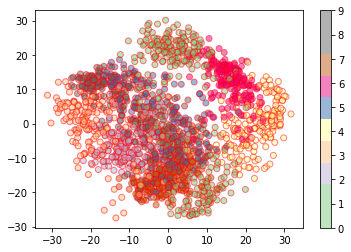

In [31]:
plt.scatter(X2D[:,0], X2D[:,1], c=digits.target, edgecolor='red', alpha=0.5, cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

Se puede apreciar que la data se puede agrupar en clusters porque se puede apreciar agrupacion en ellos

### Clusterizacion

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 10, random_state=0).fit(x)

In [45]:
kmeans.labels_

array([5, 7, 7, ..., 7, 3, 3])

In [46]:
centers = kmeans.cluster_centers_
centers

array([[ 0.00000000e+00,  1.11022302e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  1.73472348e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  8.67361738e-19,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  3.46944695e-18,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

In [47]:
centers.shape

(10, 64)

In [48]:
pca_sk = PCA(n_components=2)
centers2D = pca_sk.fit_transform(centers)
centers2D.shape

(10, 2)

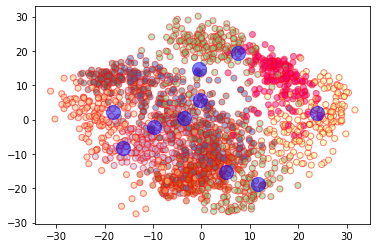

In [50]:
plt.scatter(X2D[:,0], X2D[:,1], c=digits.target, edgecolor='red', alpha=0.5, cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers2D[:, 0], centers2D[:, 1], c= 'blue', s=200, alpha=0.5)

Conclusion:
    El numero de objetos de un conjunto de datos al que se necesita acceder crece exponencialmente con la dimensionalidad subyacente